# Breast cancer Wisconsin - full robustness evaluation

In [2]:
import sklearn
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings. filterwarnings('ignore')

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'bit-flipping_breastcancer.py',
 'bit-flipping_breast_cancer_w.py',
 'bit-flipping_nursery.py',
 'bit_flipping_german_credit.py',
 'breastcancer.ipynb',
 'breast_cancer_w.ipynb',
 'combination_attack_breastcancer.py',
 'combination_attack_breast_cancer_w.py',
 'combination_attack_german_credit.py',
 'combination_attack_nursery.py',
 'demo_plot.py',
 'figures',
 'fingerprinted_data',
 'german_credit.ipynb',
 'horizontal_attack_breastcancer.py',
 'horizontal_attack_breast_cancer_w.py',
 'horizontal_attack_covtype.py',
 'horizontal_attack_german_credit.py',
 'horizontal_attack_nursery.py',
 'nursery.ipynb',
 'robustness',
 'rounding_attack_breastcancer.py',
 'rounding_attack_breast_cancer_w.py',
 'rounding_attack_german_credit.py',
 'rounding_attack_nursery.py',
 'superset_attack_breastcancer.py',
 'superset_attack_breast_cancer_w.py',
 'superset_attack_german_credit.py',
 'superset_attack_nursery.py',
 'test.png',
 'test.svg',
 'vertical_attack_breastcancer.py',
 

## Horizontal subset attack

In [4]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal = results_horizontal.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

In [5]:
results_horizontal.head(10)

,fp_len,gamma,LSB,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.00,1.0,0.0,0.00,NaN,1.0
1,128.0,1.00,1.0,0.1,0.58,NaN,1.0
2,128.0,1.00,1.0,0.2,0.86,NaN,1.0
3,128.0,1.00,1.0,0.3,0.98,NaN,1.0
4,128.0,1.00,1.0,0.4,1.00,NaN,1.0
5,128.0,1.11,1.0,0.0,0.00,NaN,0.9
6,128.0,1.11,1.0,0.1,0.79,NaN,0.9
7,128.0,1.11,1.0,0.2,0.99,NaN,0.9
8,128.0,1.11,1.0,0.3,0.98,NaN,0.9
9,128.0,1.11,1.0,0.4,1.00,NaN,0.9


In [6]:
# todo: fill out missing data

In [9]:
sns.set_theme()

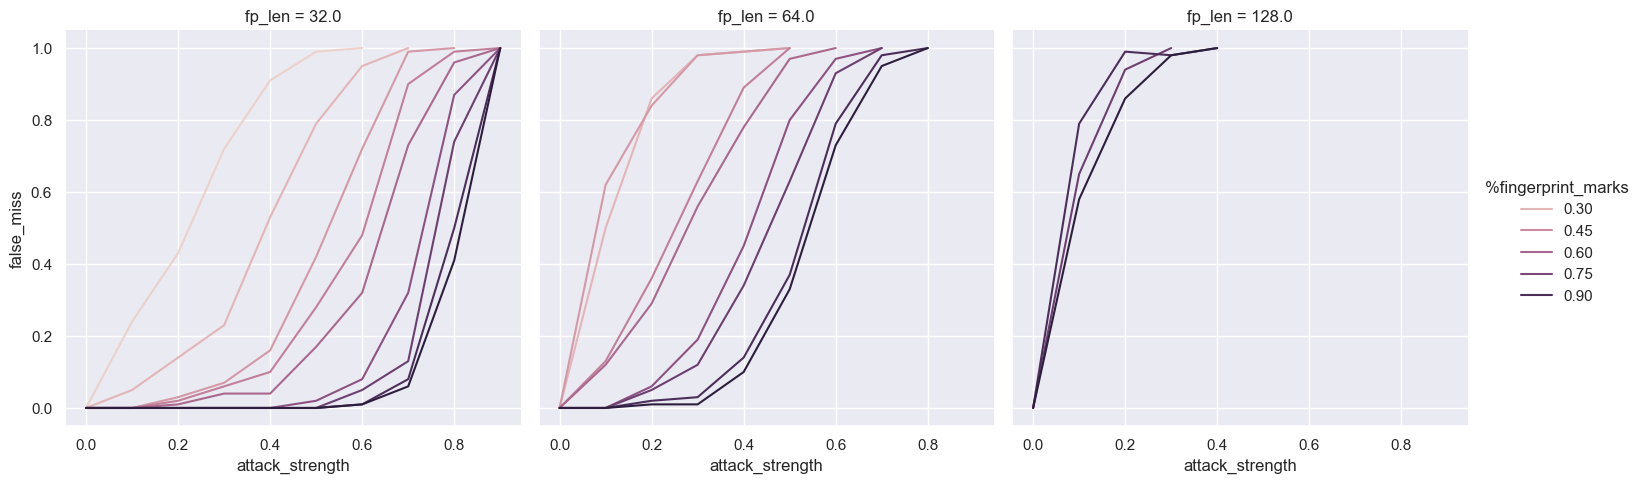

In [7]:
sns.relplot(data=results_horizontal, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_horizontal_breast_cancer_w.svg')
plt.savefig('figures/robustness_horizontal_breast_cancer_w.png')

### Theoretical estimation

In [8]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal_est/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal_est/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal_est = results_horizontal_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

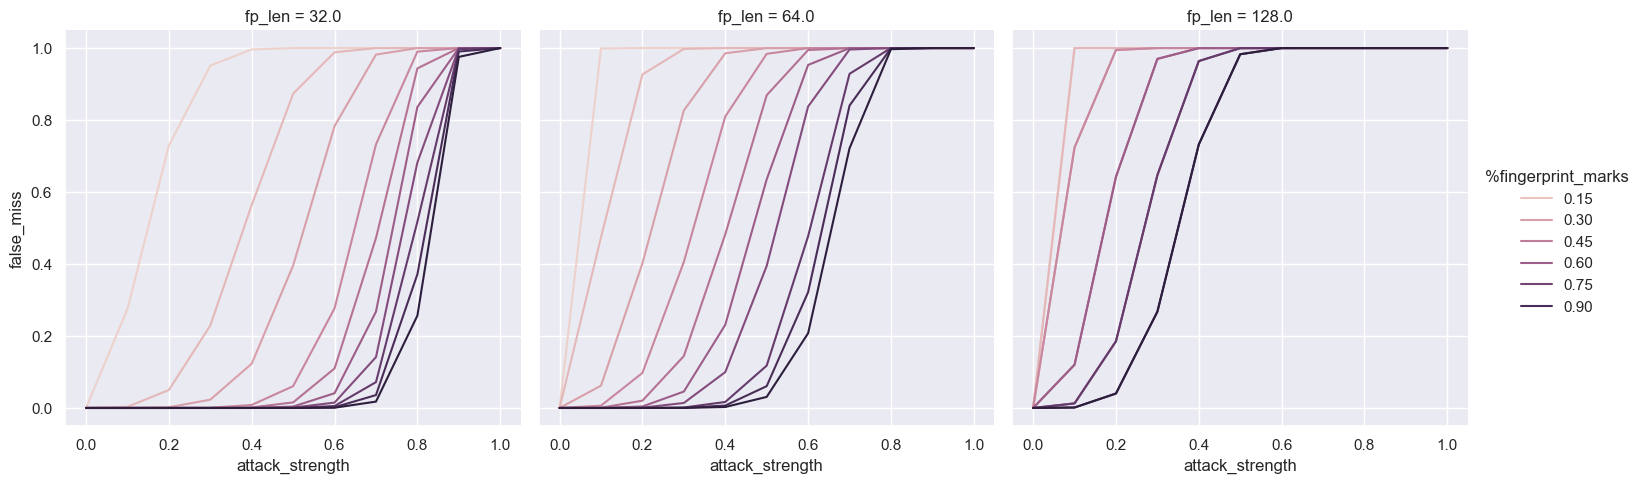

In [9]:
sns.relplot(data=results_horizontal_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')

### Comparison: empirical vs theoretical

In [10]:
results_horizontal['type'] = ['empirical' for i in range(len(results_horizontal))]
results_horizontal_est['type'] = ['theoretical' for i in range(len(results_horizontal_est))]

results_horizontal_comp = pd.concat([results_horizontal, results_horizontal_est])

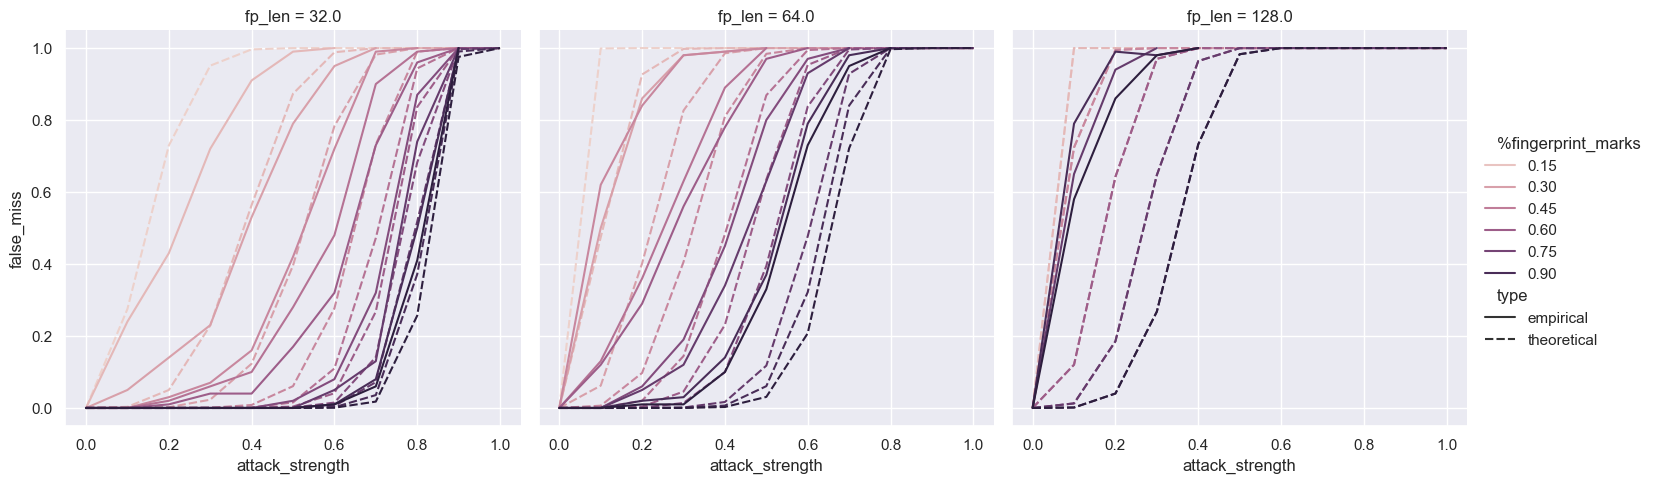

In [11]:
# plot comparison 
sns.relplot(data=results_horizontal_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')
plt.savefig('figures/robustness_horizontal_est_breast_cancer_w.svg')
plt.savefig('figures/robustness_horizontal_est_breast_cancer_w.png')

In [13]:
# todo: somehow represent the error (so that it somehow clearly shows that it's bigger for smaller datasets, especially when we 
# choose the bigger fp len). and maybe also show the actual distribution of the fingerprint bits(histogram of counts)

## Vertical subset attack

In [12]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_vertical = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical = results_vertical.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength_abs': float(key),
                                                    'attack_strength': float(key)/9.0,
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

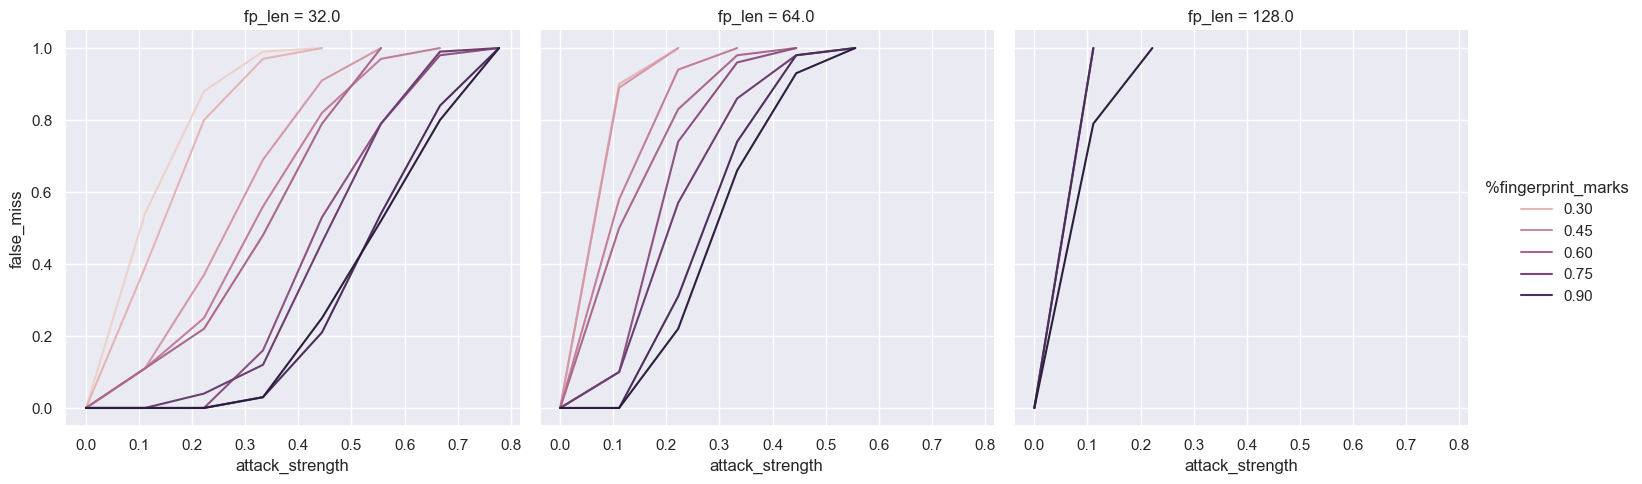

In [13]:
sns.relplot(data=results_vertical, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_vertical_breast_cancer_w.svg')
plt.savefig('figures/robustness_vertical_breast_cancer_w.png')

### Theoretical estimation

In [14]:
results_vertical_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical_est/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical_est/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical_est = results_vertical_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

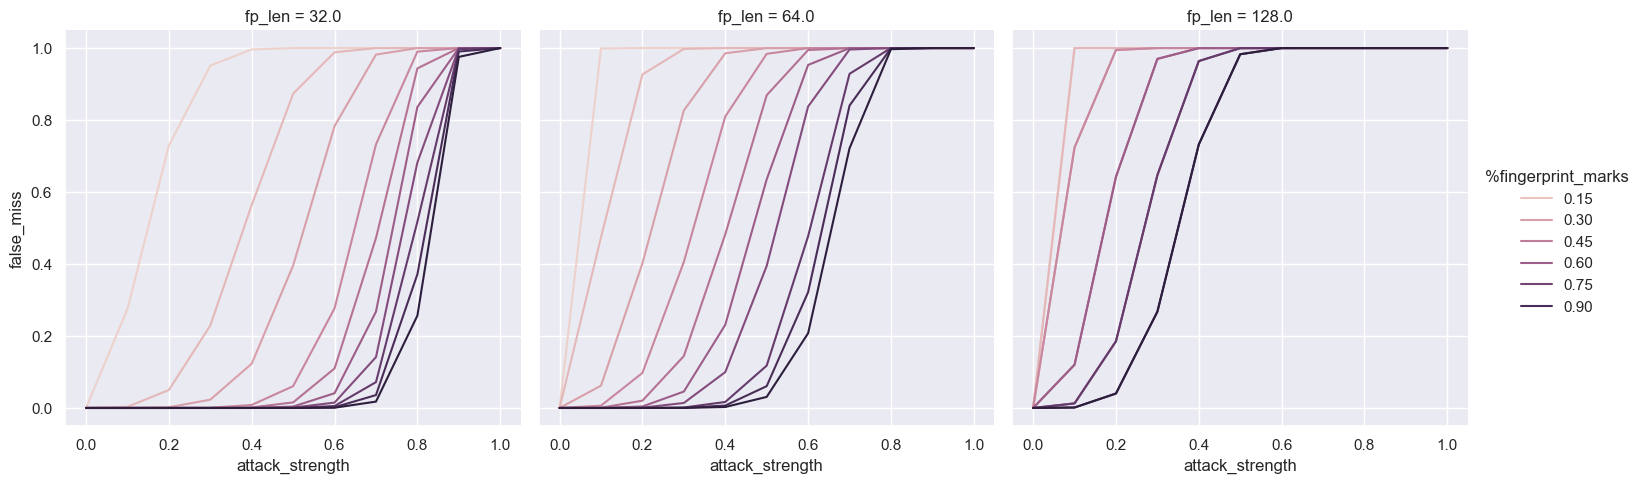

In [15]:
sns.relplot(data=results_vertical_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')

### Comparison emphirical vs theoretical

In [16]:
results_vertical['type'] = ['empirical' for i in range(len(results_vertical))]
results_vertical_est['type'] = ['theoretical' for i in range(len(results_vertical_est))]

results_vertical_comp = pd.concat([results_vertical, results_vertical_est])

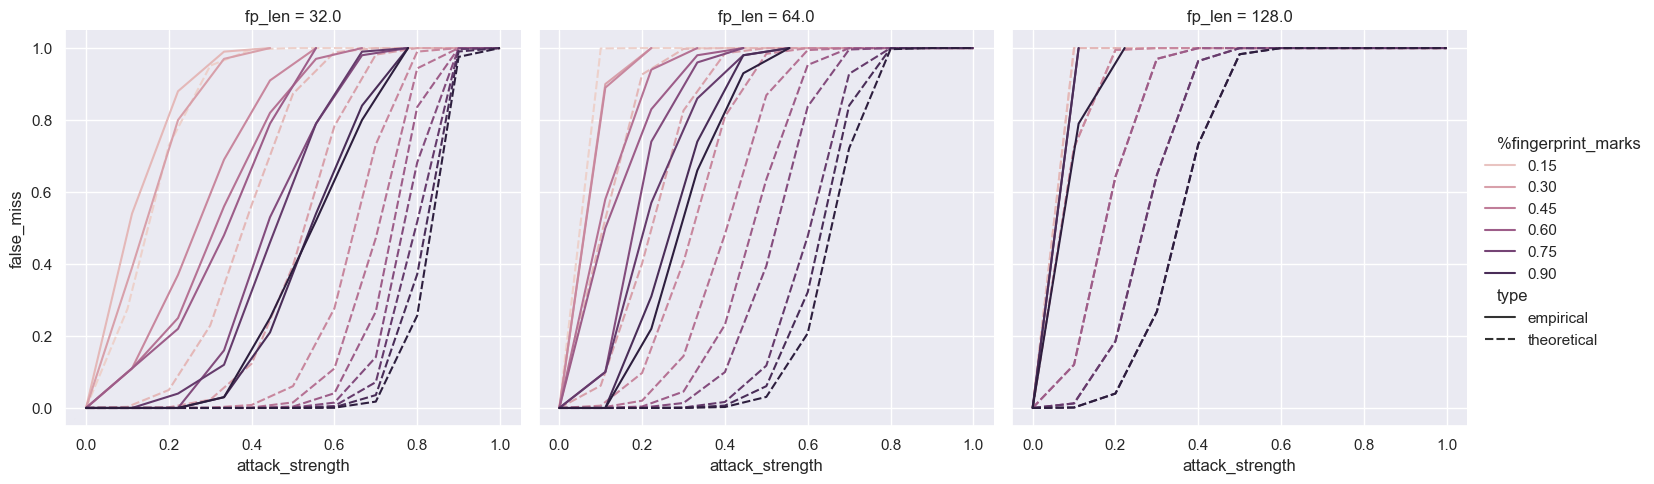

In [17]:
# plot comparison 
sns.relplot(data=results_vertical_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')
plt.savefig('figures/robustness_vertical_est_breast_cancer_w.svg')
plt.savefig('figures/robustness_vertical_est_breast_cancer_w.png')

## Flipping attack

In [13]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_flipping = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_flipping = results_flipping.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = v


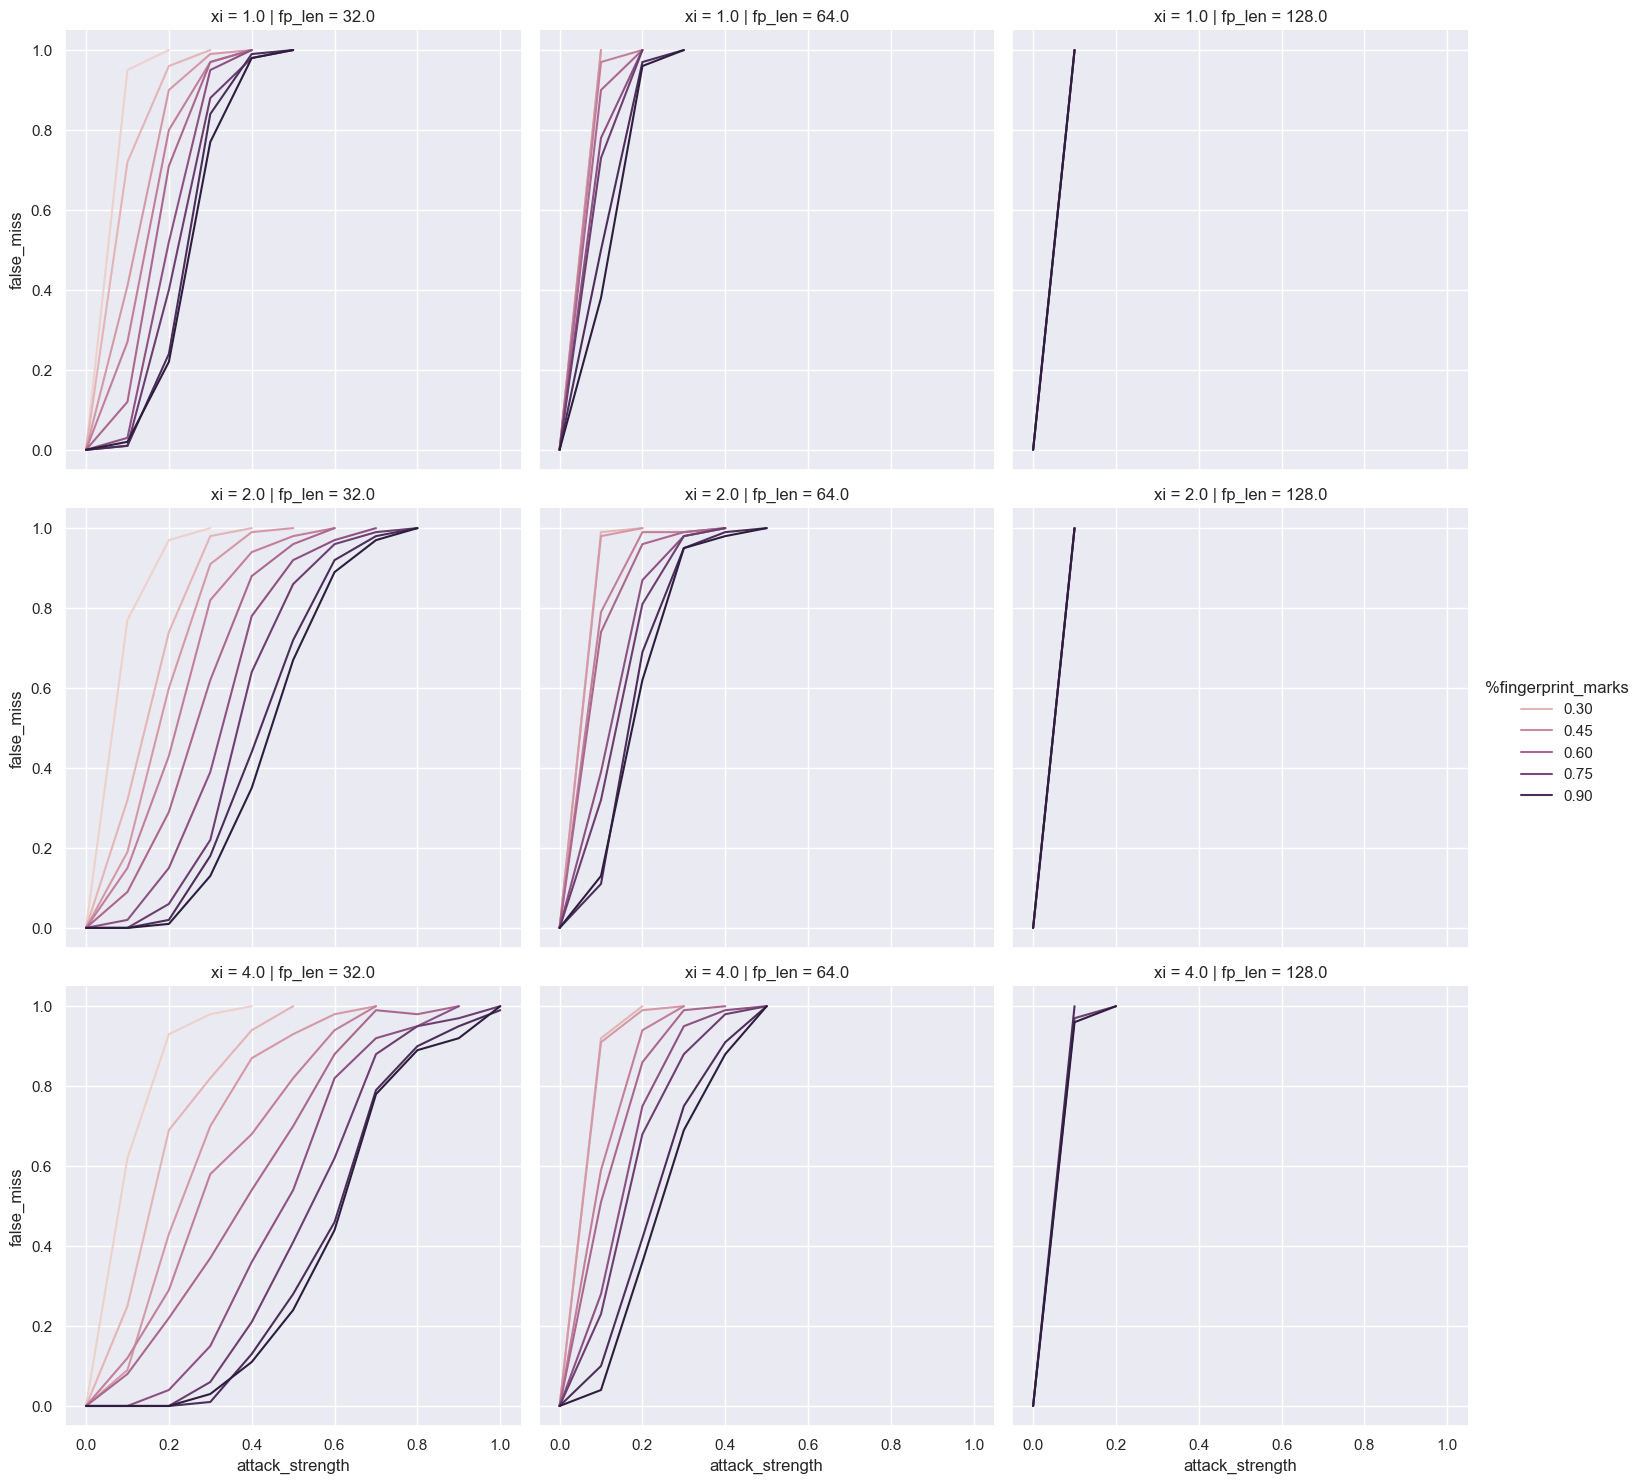

In [14]:
sns.relplot(data=results_flipping, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_flipping_breast_cancer_w.svg')
plt.savefig('figures/robustness_flipping_breast_cancer_w.png')

### Comparison empirical vs theoretical

In [15]:
results_flipping_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping_est/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping_est/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_flipping_est = results_flipping_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              'xi': xi,
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 


In [16]:
results_flipping['type'] = ['empirical' for i in range(len(results_flipping))]
results_flipping_est['type'] = ['theoretical' for i in range(len(results_flipping_est))]

results_flipping_comp = pd.concat([results_flipping, results_flipping_est])

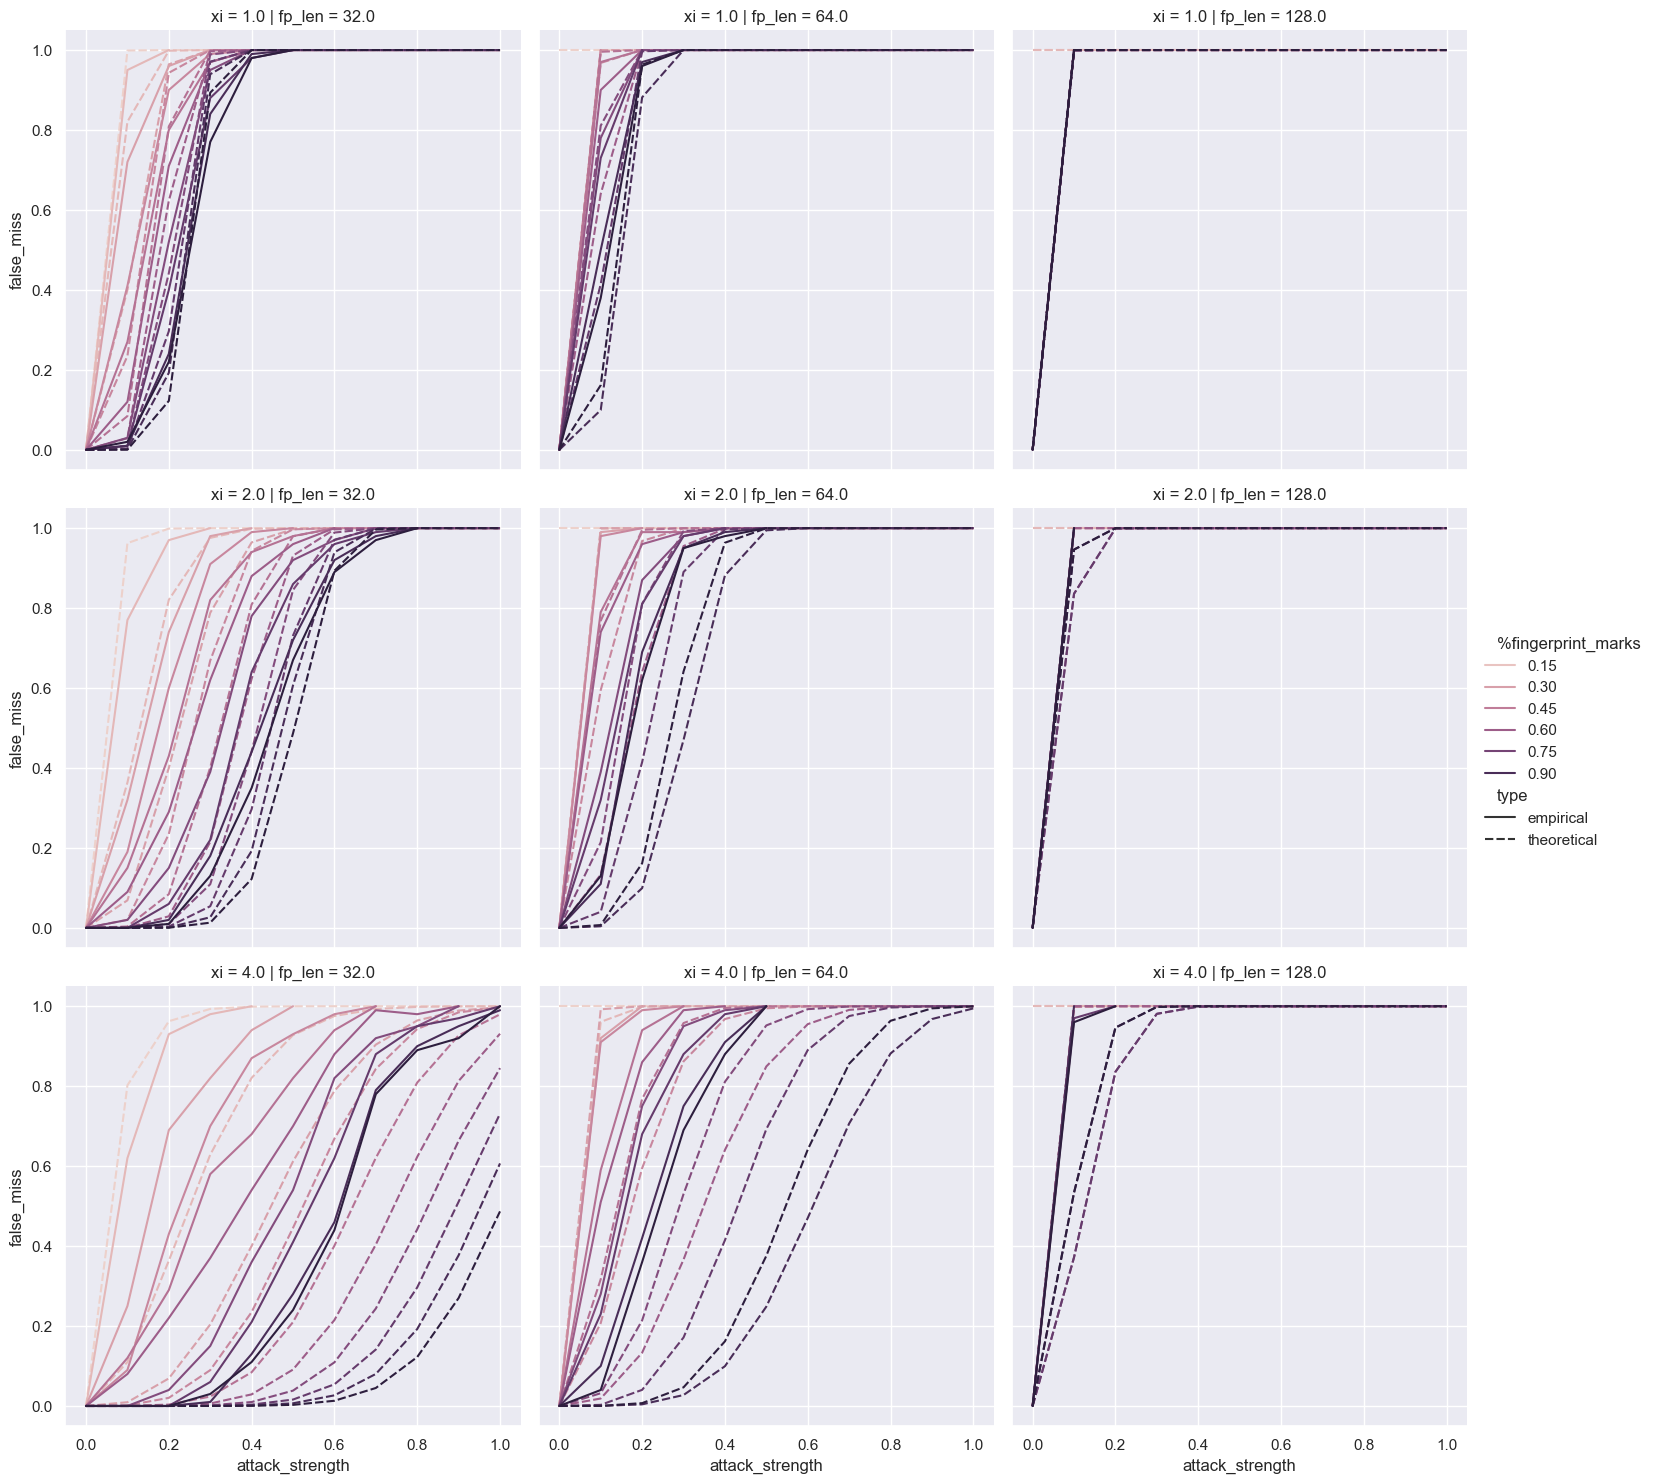

In [17]:
# plot comparison 
sns.relplot(data=results_flipping_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', row='xi', style='type')
plt.savefig('figures/robustness_flipping_est_breast_cancer_w.svg')
plt.savefig('figures/robustness_flipping_est_breast_cancer_w.png')

## Rounding attack

In [22]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/rounding/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/rounding/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = v


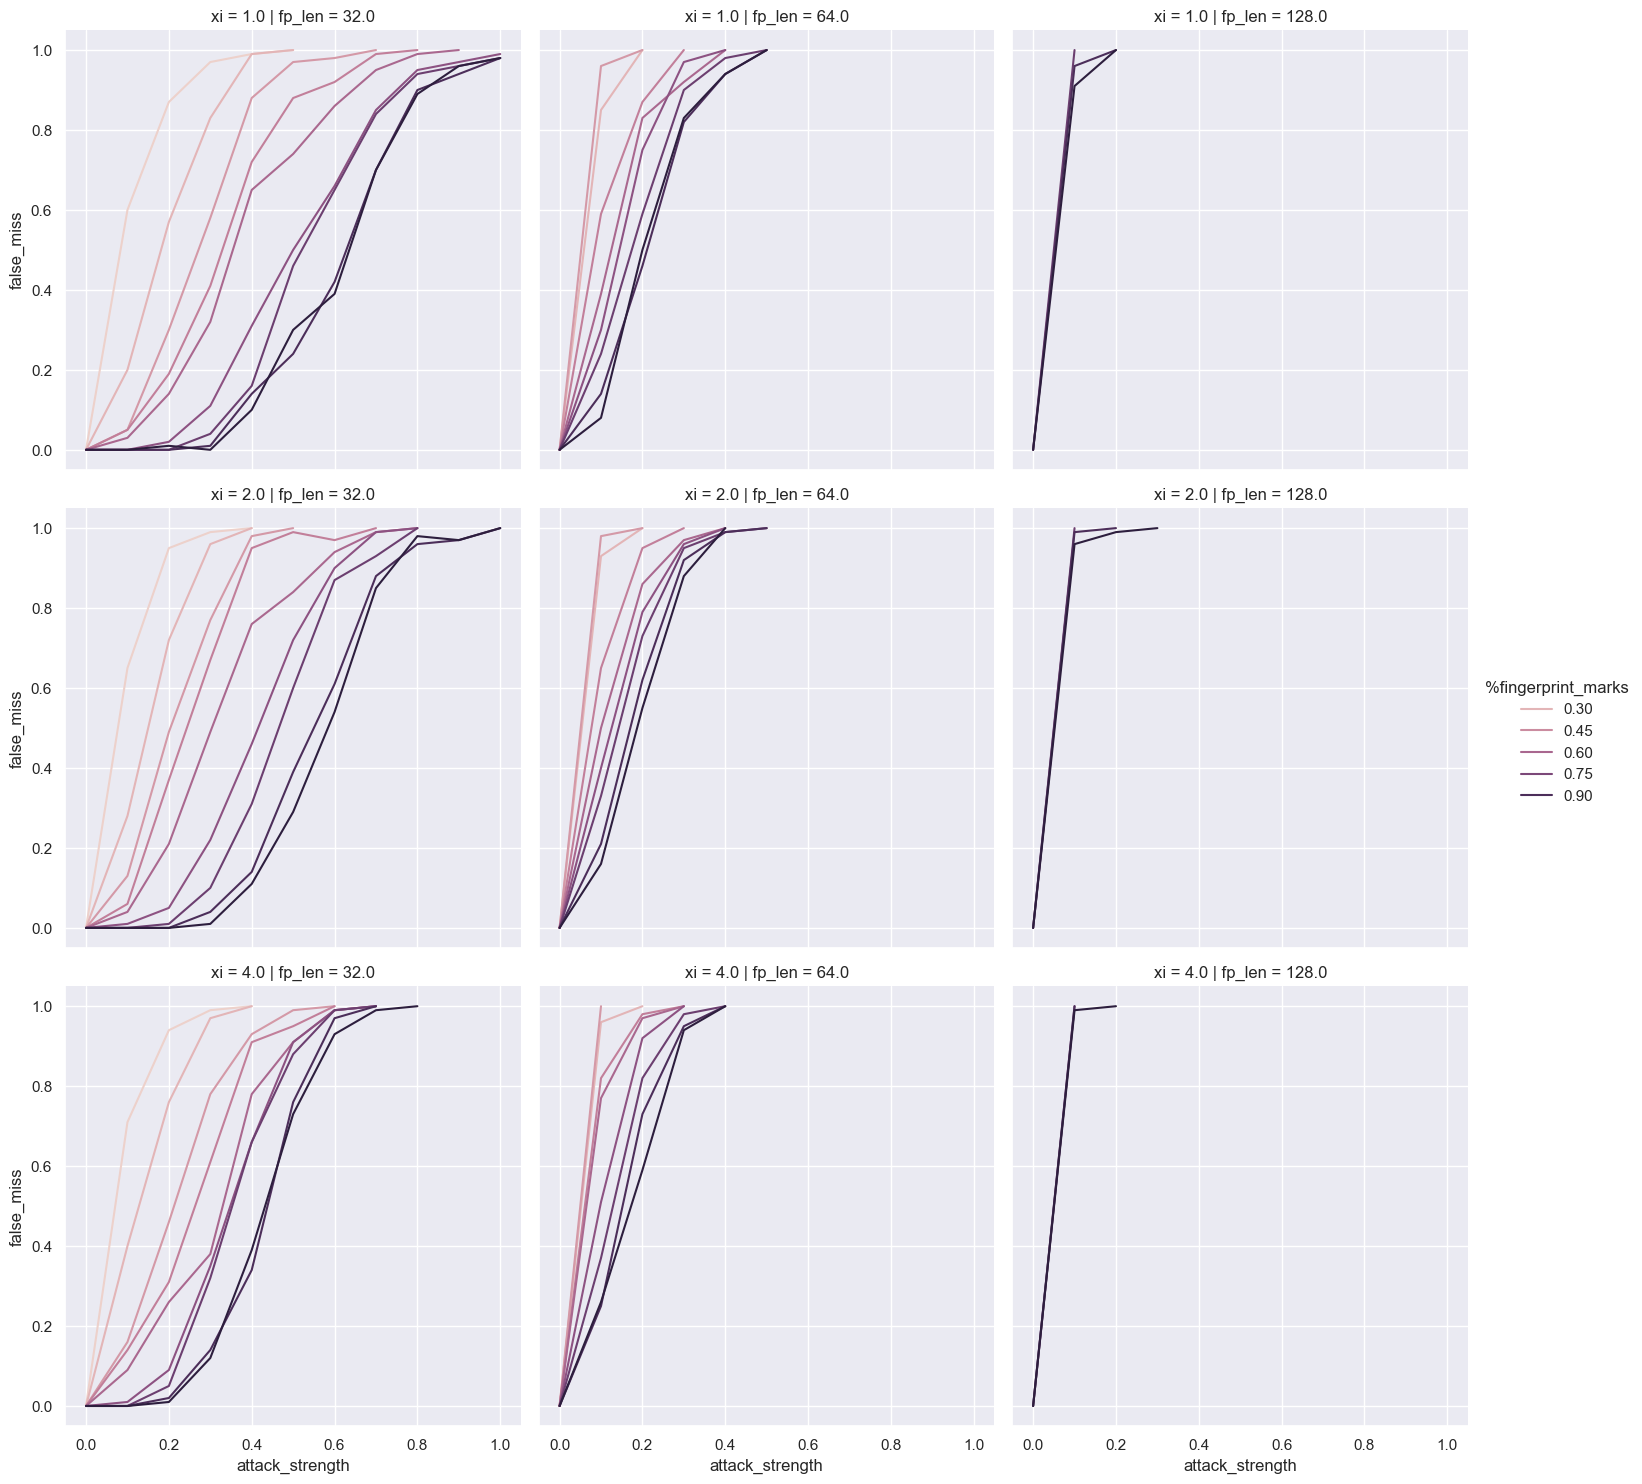

In [23]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_rounding_breast_cancer_w.svg')
plt.savefig('figures/robustness_rounding_breast_cancer_w.png')

## Superset

In [24]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/superset/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/superset/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


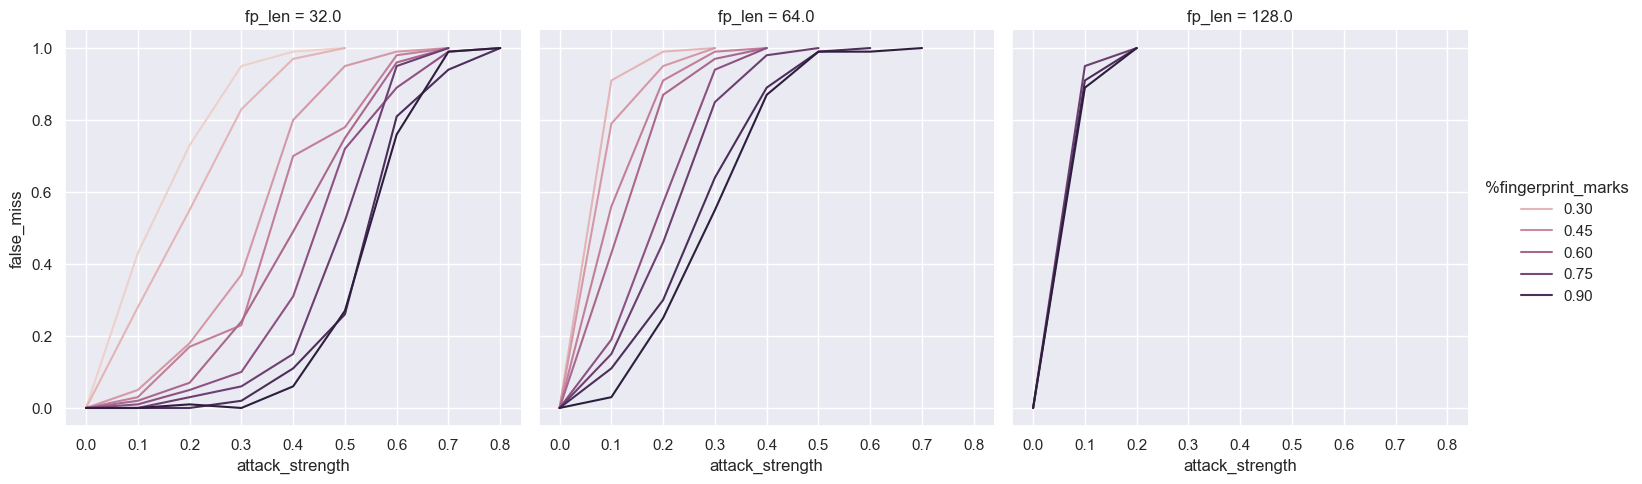

In [25]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_superset_breast_cancer_w.svg')
plt.savefig('figures/robustness_superset_breast_cancer_w.png')

## Combination attack
Superset attack (horizontal subset + synthetic imputation) + flipping attack

In [26]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/combination/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/combination/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


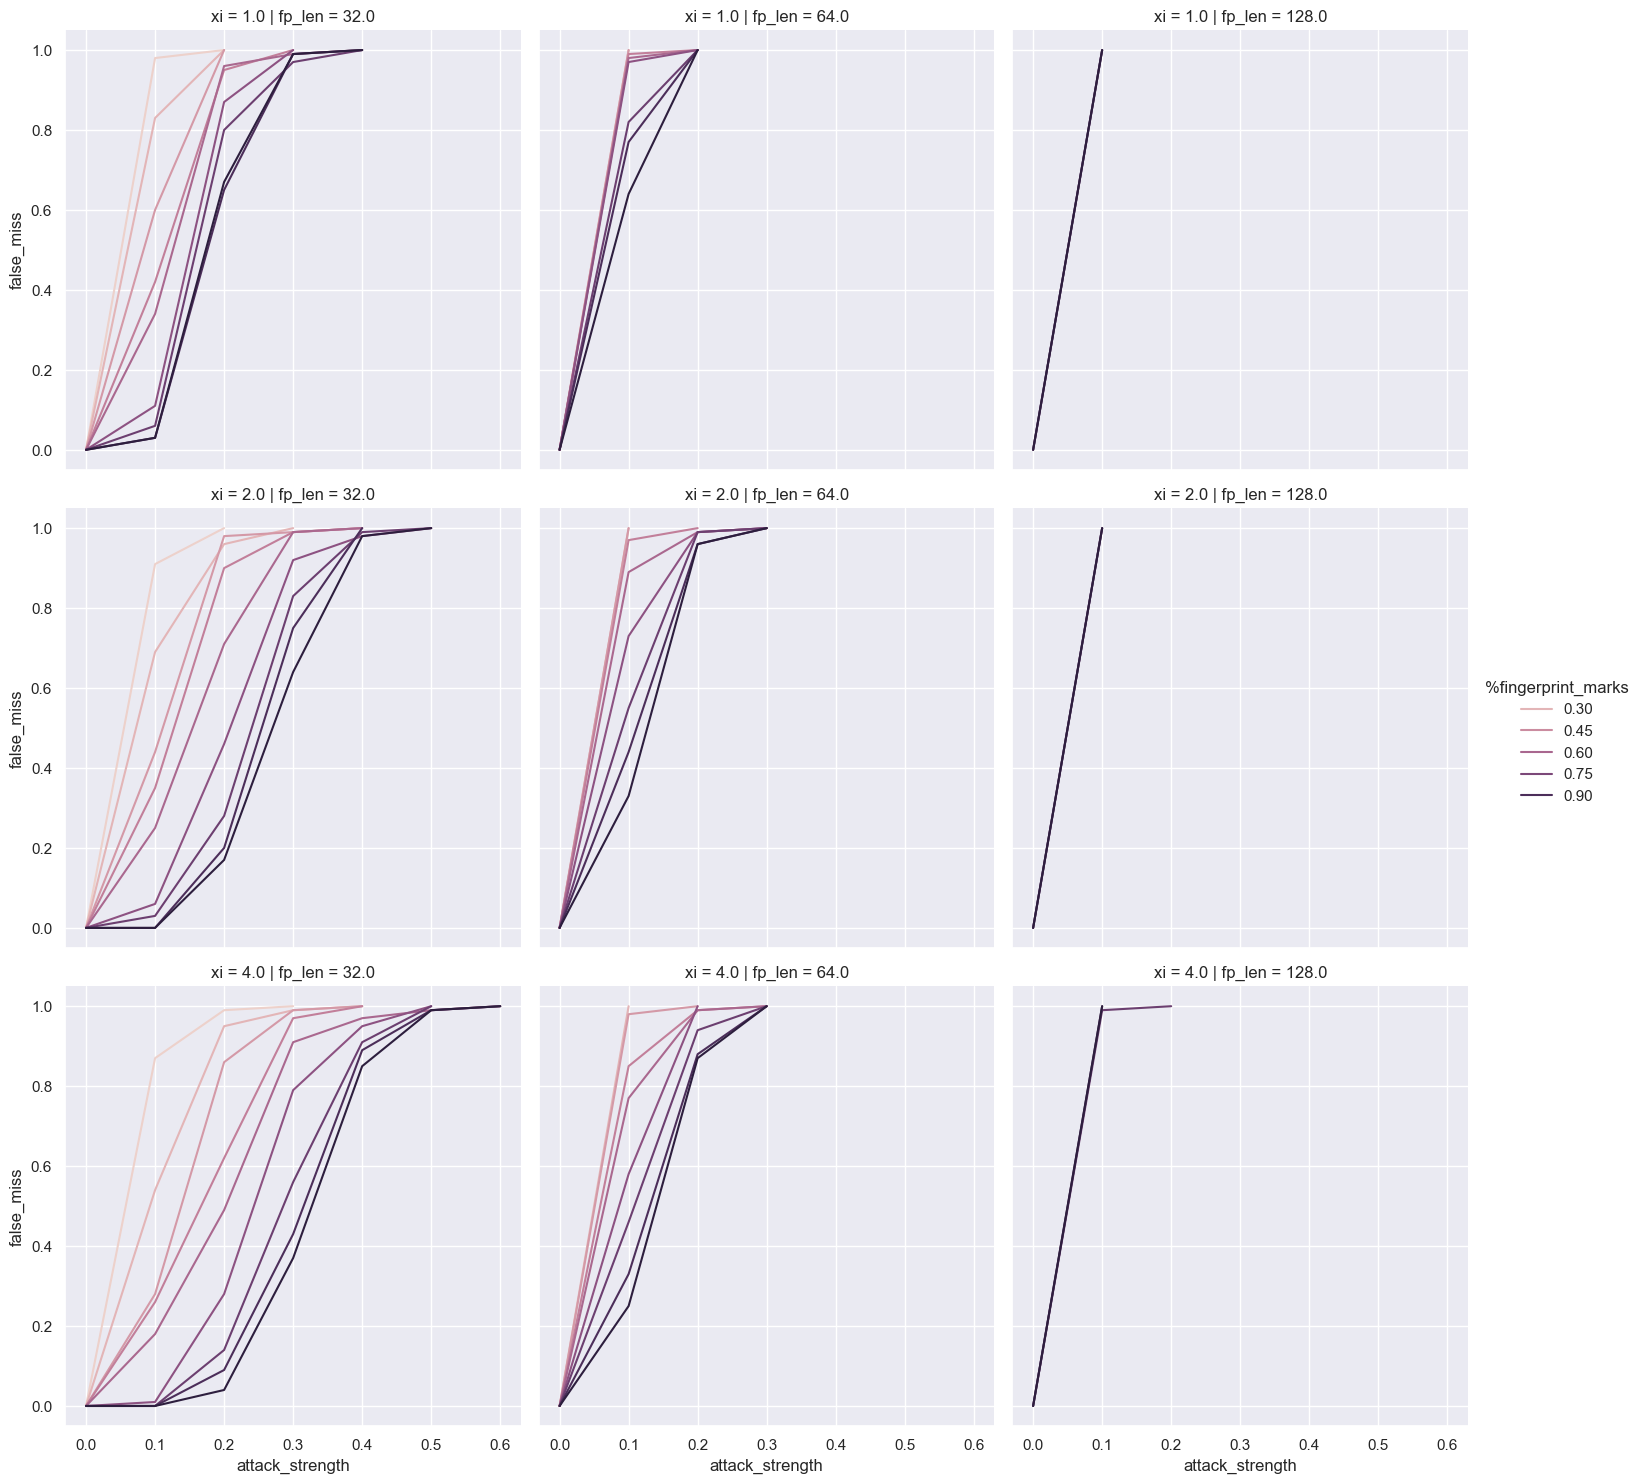

In [27]:
    sns.relplot(data=results_frame, kind='line',
               x='attack_strength', y='false_miss', hue='%fingerprint_marks',
               col='fp_len', row='xi')
    plt.savefig('figures/robustness_combination_breast_cancer_w.svg')
    plt.savefig('figures/robustness_combination_breast_cancer_w.png')